In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.4/385.2 MB 12.6 MB/s eta 0:00:31
   ---------------------------------------- 0.9/385.2 MB 13.9 MB/s eta 0:00:28
   ---------------------------------------- 1.3/385.2 MB 10.6 MB/s eta 0:00:37
   ---------------------------------------- 2.1/385.2 MB 12.1 MB/s eta 0:00:32
   ---------------------------------------- 2.4/385.2 MB 10.8 MB/s eta 0:00:36
   ---------------------------------------- 2.7/385.2 MB 10.2 MB/s eta 0:00:38
   ---------------------------------------- 3.0/385.2 MB 9.6 MB/s eta 0:00:41
   ---------------------------------------- 3.2/385.2 MB 9.0 MB/s eta 0:00:43
   ---------------------------------------- 3.5/385.2 MB 8.7 MB/s eta 0:00:45
   ---------------------------------------- 3.8/385.2 MB 8.4 MB/s eta

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [3]:
df = pd.read_csv('stock_price.csv')

In [4]:
df['日付け'] = pd.to_datetime(df['日付け'], format='%Y-%m-%d')
def convert_trading_volume(value):
    value_str = str(value).strip()
    if 'M' in value_str:
        return float(value_str.replace('M', '').replace(',', '')) * 1e6
    elif 'B' in value_str:
        return float(value_str.replace('B', '').replace(',', '')) * 1e9
    return float(value_str.replace(',', ''))

df['出来高'] = df['出来高'].apply(convert_trading_volume)
df['変化率 %'] = df['変化率 %'].str.replace('%', '').astype(float) / 100.0
numeric_cols = ['終値', '始値', '高値', '安値']
df[numeric_cols] = df[numeric_cols].replace(',', '', regex=True).astype(float)

In [5]:
print(df.head())

         日付け     終値     始値     高値     安値          出来高   変化率 %
0 2024-08-01  156.3  159.3  159.4  156.1   79150000.0 -0.0256
1 2024-07-31  160.4  158.2  160.7  158.1  173910000.0  0.0107
2 2024-07-30  158.7  158.8  159.2  158.0  138140000.0 -0.0063
3 2024-07-29  159.7  158.7  160.2  158.4  126280000.0  0.0114
4 2024-07-26  157.9  159.3  159.6  157.9  155080000.0 -0.0013


In [6]:
summary_stats = df.describe()
print(summary_stats)

                                 日付け           終値           始値           高値  \
count                           9202  9202.000000  9202.000000  9202.000000   
mean   2005-10-21 08:44:04.642469248    92.180961    92.256183    93.176451   
min              1987-02-12 00:00:00    33.000000    33.000000    33.200000   
25%              1996-06-06 06:00:00    52.000000    52.100000    52.800000   
50%              2005-10-11 12:00:00    85.100000    85.100000    86.050000   
75%              2015-03-04 18:00:00   110.800000   110.800000   111.900000   
max              2024-08-01 00:00:00   305.900000   309.800000   311.800000   
std                              NaN    50.452228    50.598215    51.049837   

                安値           出来高        変化率 %  
count  9202.000000  9.202000e+03  9202.000000  
mean     91.330146  1.726677e+08     0.000175  
min      32.200000  9.340000e+06    -0.147400  
25%      51.500000  8.073000e+07    -0.009400  
50%      84.200000  1.540150e+08     0.000000  


C:\Users\PRANEETH\AppData\Local\Temp\ipykernel_33532\2778685485.py:10: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from current font.
  plt.tight_layout()
C:\Users\PRANEETH\AppData\Local\Temp\ipykernel_33532\2778685485.py:10: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  plt.tight_layout()
D:\coding\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\coding\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


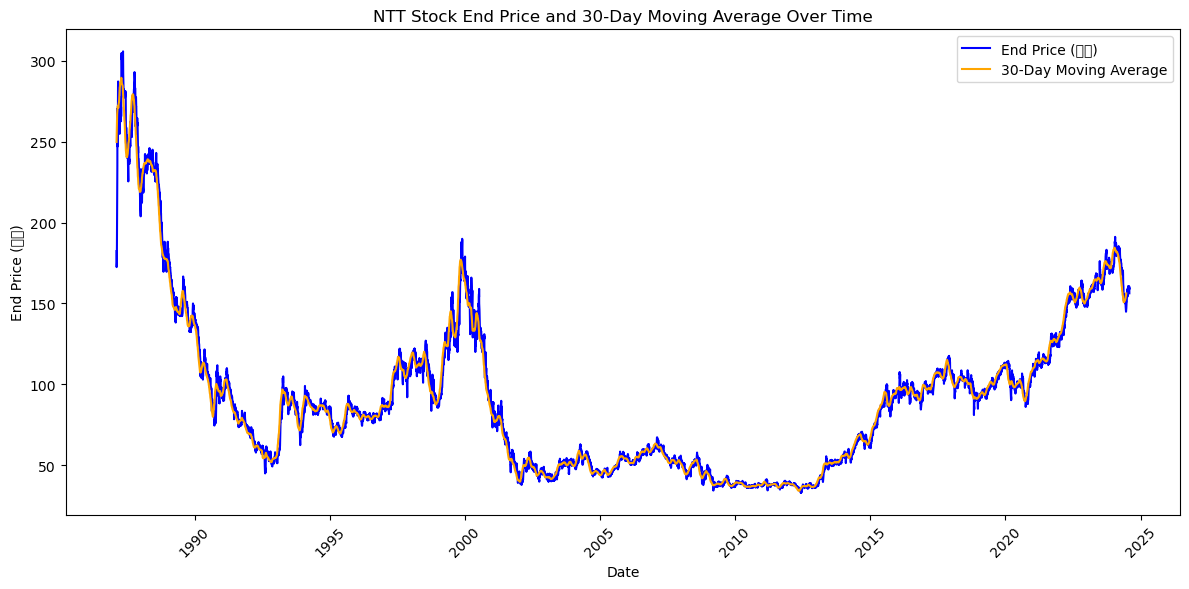

D:\coding\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\coding\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\coding\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\coding\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\coding\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


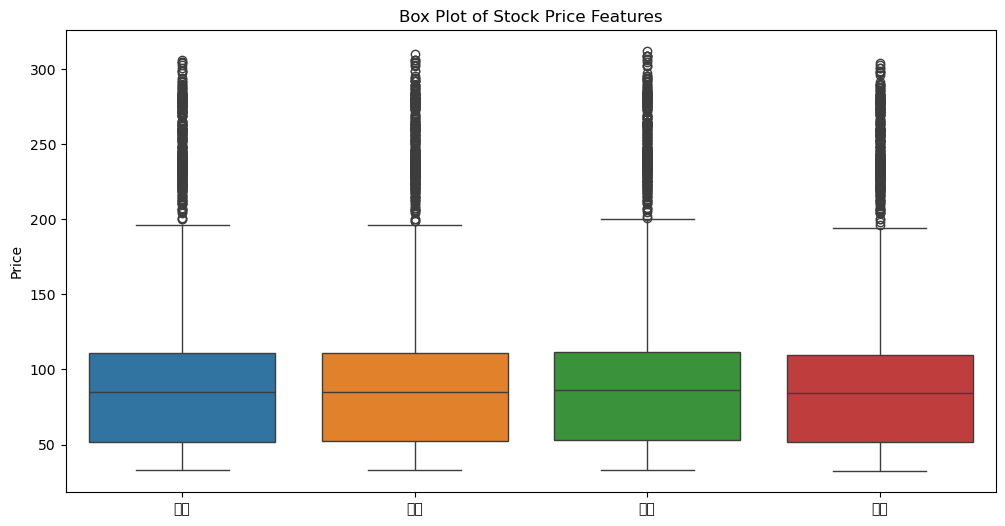

In [7]:
df['30-Day MA'] = df['終値'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['日付け'], df['終値'], label='End Price (終値)', color='blue')
plt.plot(df['日付け'], df['30-Day MA'], label='30-Day Moving Average', color='orange')
plt.title('NTT Stock End Price and 30-Day Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('End Price (終値)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plot of Stock Price Features')
plt.ylabel('Price')
plt.show()

In [8]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)
df = df.dropna()

Missing values:
 日付け           0
終値            0
始値            0
高値            0
安値            0
出来高           0
変化率 %         0
30-Day MA    29
dtype: int64


In [9]:
scaler = StandardScaler()
df[['終値', '始値', '高値', '安値', '出来高', '変化率 %']] = scaler.fit_transform(df[['終値', '始値', '高値', '安値', '出来高', '変化率 %']])

In [10]:
data = df[['終値']].values
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = minmax_scaler.fit_transform(data)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=10)

D:\coding\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 68s 9ms/step - loss: 9.9455e-04
Epoch 2/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 66s 9ms/step - loss: 5.2665e-04
Epoch 3/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 72s 10ms/step - loss: 3.9791e-04
Epoch 4/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 72s 10ms/step - loss: 3.7719e-04
Epoch 5/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 76s 10ms/step - loss: 3.3330e-04
Epoch 6/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step - loss: 3.2378e-04
Epoch 7/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 3.1129e-04
Epoch 8/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 73s 10ms/step - loss: 3.0451e-04
Epoch 9/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 69s 9ms/step - loss: 2.8560e-04
Epoch 10/10
7307/7307 ━━━━━━━━━━━━━━━━━━━━ 69s 9ms/step - loss: 2.5634e-04


229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train RMSE: 0.7180376578690773, Test RMSE: 1.1802572465506178


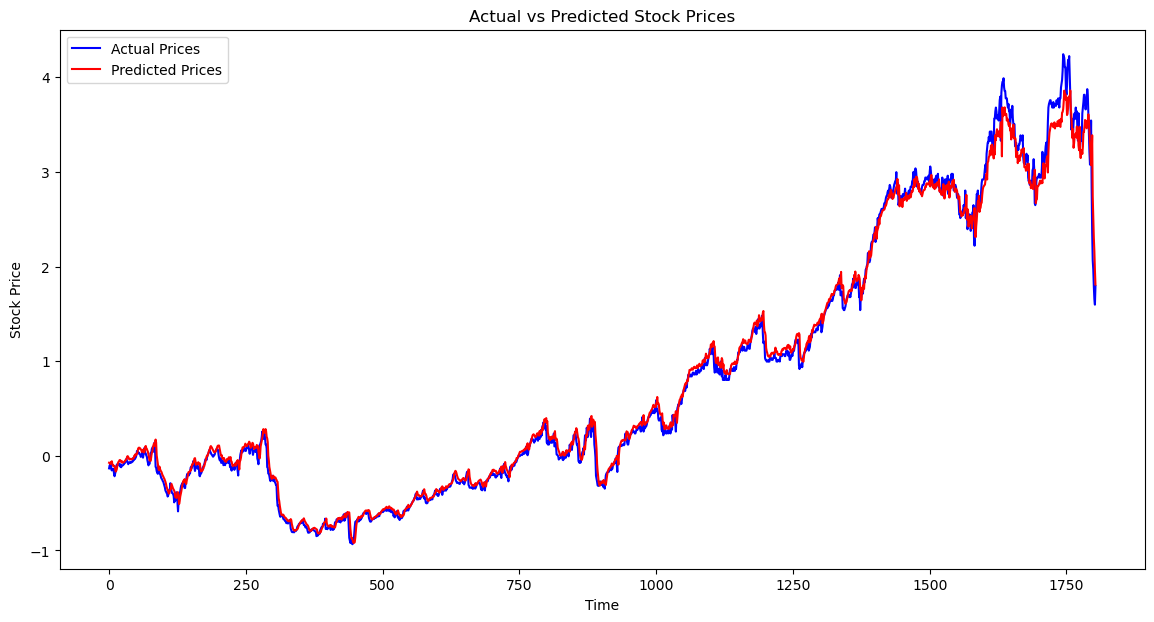

In [11]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = minmax_scaler.inverse_transform(train_predict)
test_predict = minmax_scaler.inverse_transform(test_predict)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
plt.figure(figsize=(14, 7))
plt.plot(minmax_scaler.inverse_transform(test_data[time_step+1:]), label='Actual Prices', color='blue')
plt.plot(test_predict, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()